In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

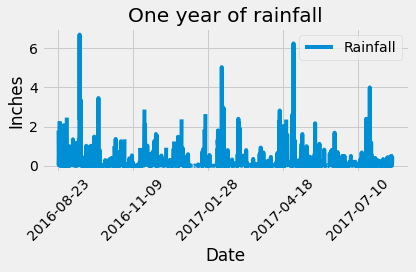

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
prev_year

# Perform a query to retrieve the data and precipitation scores for prev_year
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
prcp_results

# yearly_prcp = {date: prcp for date, prcp in prcp_results}
# yearly_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_results,columns = ["Date","Rainfall"])
prcp_df

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date")
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x = "Date", y = "Rainfall",rot = 45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("One year of rainfall")
plt.tight_layout()
plt.savefig("./Resources/Prcp_barchart.png")

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Rainfall
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
station_results= session.query(Station.station).all()
station_results

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

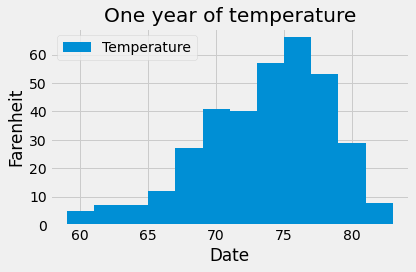

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_before = dt.date(2017,8,23) - dt.timedelta(days=365)
tobs_result = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_before).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_df = pd.DataFrame(tobs_result,columns = ["Temperature"])
tobs_df


# Use Pandas Plotting with Matplotlib to plot the data
tobs_df.plot.hist(bins= 12)
plt.xlabel("Date")
plt.ylabel("Farenheit")
plt.title("One year of temperature")
plt.tight_layout()
plt.savefig("./Resources/Tobs_histogram.png")


# Close session

In [ ]:
# Close Session
session.close()